In [49]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from tqdm import tqdm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
import keras
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers

In [50]:
# reading tweets data
df=pd.read_csv('/users/macbookpro/processed_train.csv')
df_test=pd.read_csv('/users/macbookpro/processed_test.csv')
df

,sentiment,username,verified,followersCount,content,date,country,replyCount,retweetCount,likeCount,url,hashtags,processed,cleantext_no_spell,cleantext_no_spell_no_lemma
0,1,wintersgordon,False,342,Still trying to master that contour? A mistake...,2022-08-26 11:35:12+00:00,Argentina,0,0,0,https://twitter.com/wintersgordon/status/15631...,"['contour', 'contouringmakeup', 'countouring',...",still try to master that contour a mistake tha...,still try to master that contour a mistake tha...,still try to master that contour a mistake tha...
1,0,TheTressXpress,False,74,Our first Pop Up of 2022 🥳👏🏽\nJoin us from 10a...,2022-07-27 14:24:19+00:00,Papua New Guinea,0,3,2,https://twitter.com/TheTressXpress/status/1552...,"['popup', 'business', 'hairproducts', 'summer']",our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...
2,1,Style_Sage,False,967,"Our June Beauty Report is live, and here are s...",2022-06-15 17:50:48+00:00,Argentina,0,0,0,https://twitter.com/Style_Sage/status/15371305...,"['beauty', 'beautytrends', 'makeup']",our june beauty report be live and here be som...,our june beauty report be live and here be som...,our june beauty report be live and here be som...
3,0,BeautyLashed,False,2,📷 Definitely not shy 🤩 @keiana.mua absolutely ...,2022-07-30 14:44:50+00:00,Argentina,0,0,0,https://twitter.com/BeautyLashed/status/155339...,"['makeuptransformation', 'makeuptutorial', 'ma...",camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...
4,1,tecyl1971,False,41,The Sonya™ daily skincare system delivers aloe...,2022-07-06 20:02:51+00:00,Argentina,0,0,1,https://twitter.com/tecyl1971/status/154477389...,"['foreverskincare', 'dailyskincare', 'tecylalo...",the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,NaturenovaH,False,57,✅ Provides a radiant glow\n✅ Fights signs of a...,2022-08-30 18:05:26+00:00,Argentina,0,0,0,https://twitter.com/NaturenovaH/status/1564675...,"['naturenova', 'naturenovaherbals', 'parabenfr...",check_mark_button provide a radiant glow check...,check_mark_button provide a radiant glow check...,check_mark_button provide a radiant glow check...
996,0,50PlusNow,False,2020,Do You Wash Your Face Before or After You Show...,2022-08-25 19:30:32+00:00,Argentina,0,0,1,https://twitter.com/50PlusNow/status/156288515...,"['skincare', 'facecare', 'beauty', 'dermatolog...",do you wash your face before or after you show...,do you wash your face before or after you show...,do you wash your face before or after you show...
997,0,yankeeshoppe,False,132,#makeup #likeforfollow Women's Casual Mini Dre...,2022-08-30 17:17:41+00:00,Argentina,0,0,1,https://twitter.com/yankeeshoppe/status/156466...,"['makeup', 'likeforfollow']",women s casual mini dress,women s casual mini dress,women s casual mini dress
998,1,ReviewStudioUK1,False,846,#ad #gifted Is the heat making your #eczema or...,2022-08-29 14:07:31+00:00,Argentina,0,0,1,https://twitter.com/ReviewStudioUK1/status/156...,"['ad', 'gifted', 'eczema', 'psoriasis', 'daily...",be the heat make your or worse will south and ...,be the heat make your or worse will south and ...,be the heat make your or worse will south and ...


In [51]:
df.head()

,sentiment,username,verified,followersCount,content,date,country,replyCount,retweetCount,likeCount,url,hashtags,processed,cleantext_no_spell,cleantext_no_spell_no_lemma
0,1,wintersgordon,False,342,Still trying to master that contour? A mistake...,2022-08-26 11:35:12+00:00,Argentina,0,0,0,https://twitter.com/wintersgordon/status/15631...,"['contour', 'contouringmakeup', 'countouring',...",still try to master that contour a mistake tha...,still try to master that contour a mistake tha...,still try to master that contour a mistake tha...
1,0,TheTressXpress,False,74,Our first Pop Up of 2022 🥳👏🏽\nJoin us from 10a...,2022-07-27 14:24:19+00:00,Papua New Guinea,0,3,2,https://twitter.com/TheTressXpress/status/1552...,"['popup', 'business', 'hairproducts', 'summer']",our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...
2,1,Style_Sage,False,967,"Our June Beauty Report is live, and here are s...",2022-06-15 17:50:48+00:00,Argentina,0,0,0,https://twitter.com/Style_Sage/status/15371305...,"['beauty', 'beautytrends', 'makeup']",our june beauty report be live and here be som...,our june beauty report be live and here be som...,our june beauty report be live and here be som...
3,0,BeautyLashed,False,2,📷 Definitely not shy 🤩 @keiana.mua absolutely ...,2022-07-30 14:44:50+00:00,Argentina,0,0,0,https://twitter.com/BeautyLashed/status/155339...,"['makeuptransformation', 'makeuptutorial', 'ma...",camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...
4,1,tecyl1971,False,41,The Sonya™ daily skincare system delivers aloe...,2022-07-06 20:02:51+00:00,Argentina,0,0,1,https://twitter.com/tecyl1971/status/154477389...,"['foreverskincare', 'dailyskincare', 'tecylalo...",the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...


In [52]:
df=df.drop(['username','date','country','replyCount','retweetCount','likeCount','url'],axis=1)
df_new = df
df= df.drop(['content'], axis =1)
df_test=df_test.drop(['username','date','country','content','replyCount','retweetCount','likeCount','url'],axis=1)
                      

In [53]:
df.head()

,sentiment,verified,followersCount,hashtags,processed,cleantext_no_spell,cleantext_no_spell_no_lemma
0,1,False,342,"['contour', 'contouringmakeup', 'countouring',...",still try to master that contour a mistake tha...,still try to master that contour a mistake tha...,still try to master that contour a mistake tha...
1,0,False,74,"['popup', 'business', 'hairproducts', 'summer']",our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...
2,1,False,967,"['beauty', 'beautytrends', 'makeup']",our june beauty report be live and here be som...,our june beauty report be live and here be som...,our june beauty report be live and here be som...
3,0,False,2,"['makeuptransformation', 'makeuptutorial', 'ma...",camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...
4,1,False,41,"['foreverskincare', 'dailyskincare', 'tecylalo...",the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...


In [54]:
df_new.head()


,sentiment,verified,followersCount,content,hashtags,processed,cleantext_no_spell,cleantext_no_spell_no_lemma
0,1,False,342,Still trying to master that contour? A mistake...,"['contour', 'contouringmakeup', 'countouring',...",still try to master that contour a mistake tha...,still try to master that contour a mistake tha...,still try to master that contour a mistake tha...
1,0,False,74,Our first Pop Up of 2022 🥳👏🏽\nJoin us from 10a...,"['popup', 'business', 'hairproducts', 'summer']",our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...,our first pop up of 2022 partying_face clippin...
2,1,False,967,"Our June Beauty Report is live, and here are s...","['beauty', 'beautytrends', 'makeup']",our june beauty report be live and here be som...,our june beauty report be live and here be som...,our june beauty report be live and here be som...
3,0,False,2,📷 Definitely not shy 🤩 @keiana.mua absolutely ...,"['makeuptransformation', 'makeuptutorial', 'ma...",camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...,camera definitely not shy star strike absolute...
4,1,False,41,The Sonya™ daily skincare system delivers aloe...,"['foreverskincare', 'dailyskincare', 'tecylalo...",the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...,the sony trade_mark daily sincere system deliv...


In [55]:
df_test.head()


,sentiment,verified,followersCount,hashtags,processed,cleantext_no_spell,cleantext_no_spell_no_lemma
0,0,False,180,"['TryNotImages', 'beauty', 'sunset', 'winstons...",summer summer summertime time to sit back and ...,summer summer summertime time to sit back and ...,summer summer summertime time to sit back and ...
1,1,False,33,"['ArarGroup', 'ArarServices', 'ArarInnovation'...",when your hair be in good shape it undoubtedly...,when your hair be in good shape it undoubtedly...,when your hair be in good shape it undoubtedly...
2,0,False,3933,"['makeuptransformation', 'makeuptrends', 'make...",walk you like a dog via,walk you like a dog via,walk you like a dog via
3,1,False,44,"['Avon', 'Beauty', 'AvonBeauty', 'MakeUp', 'Av...",it be pay day so go on and treat yourself you ...,it be pay day so go on and treat yourself you ...,it be pay day so go on and treat yourself you ...
4,1,False,22,"['SkincareTips', 'Moisturise']",here be some tip of what sincere range might w...,here be some tip of what sincere range might w...,here be some tip of what sincere range might w...


In [56]:
# getting value counts for each sentiment in train df
print("Label Count")
df['sentiment'].value_counts()

Label Count


 1    498
 0    412
-1     90
Name: sentiment, dtype: int64

In [57]:
###SVM

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create feature vectors using tfidf
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(df['processed'])
test_vectors = vectorizer.transform(df_test['processed'])


In [59]:
# fit the svm models
from sklearn.preprocessing import PolynomialFeatures
linear = svm.SVC(kernel='linear').fit(train_vectors, df['sentiment'])
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(train_vectors, df['sentiment'])

In [60]:
# make predictions
linear_pred = linear.predict(test_vectors)
poly_pred = rbf.predict(test_vectors)

In [61]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_score=round(accuracy_score(linear_pred,df_test['sentiment']), 3)
precision = round(precision_score(df_test['sentiment'],linear_pred, average="weighted"), 3)
recall = round(recall_score(df_test['sentiment'],linear_pred, average="weighted"), 3)
f1_score = round(f1_score(df_test['sentiment'], linear_pred, average="weighted"), 3)

print('Linear Kernel:')
print('Accuracy:   ', accuracy_score)
print('Precision:  ', precision)
print('Recall:     ', recall)
print('F1 Score:   ', f1_score)

Linear Kernel:
Accuracy:    0.58
Precision:   0.623
Recall:      0.58
F1 Score:    0.582


/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


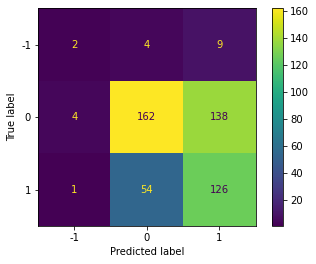

In [62]:
# plot confusion matrix
plot_confusion_matrix(linear, test_vectors, df_test['sentiment']) 
plt.show()

/Users/macbookpro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


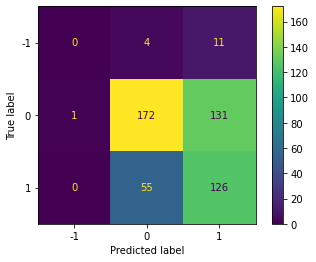

In [63]:
plot_confusion_matrix(rbf, test_vectors, df_test['sentiment']) 
plt.show()